In [21]:
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read the titanic data

titanic = pd.read_csv("titanic.csv")

# Make gender a dummy variable

titanic["Gender"] = titanic["Sex"].apply(lambda d: 1 if d == "female" else 0)

# Drop irrelevant variables, being sex and name

titanic.drop(["Name", "Sex"], axis = 1, inplace = True)

# Separate x and y

y = titanic["Survived"].values
X = titanic[["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "Gender"]].values

# Ensemble Models

In [2]:
# Dataframes for results
    
resall = pd.DataFrame()
res_w1 = pd.DataFrame()

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [4]:
# Determine parameters
    
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
num_trees = 100

## Bagged Decision Trees

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

learner = DecisionTreeClassifier(random_state=seed)
model = BaggingClassifier(base_estimator=learner, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, y, cv=kfold)
res_w1["Res"] = results
res_w1["Type"] = "Bagged DT"
resall = pd.concat([resall,res_w1], ignore_index=True)
                   
print(f'Bagged Decision Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

Bagged Decision Trees - Accuracy 81.959% std 3.460385


## Bagged Decision Trees

In [7]:
from sklearn.ensemble import RandomForestClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

num_trees = 100
num_features = 3

model = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, random_state = seed)
results = cross_val_score(model, X, y, cv = kfold)

print(f'Random Forest - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"] = results
res_w1["Type"] = "Random Forest"

resall=pd.concat([resall,res_w1], ignore_index=True)

Random Forest - Accuracy 81.618% std 4.235826


## Extra Trees

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

seed = 7

kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)

num_trees = 300
num_features = 5

model = ExtraTreesClassifier(n_estimators = num_trees, max_features = num_features, random_state = seed)

results = cross_val_score(model, X, y, cv = kfold)

print(f'Extra Trees - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"] = results
res_w1["Type"] = "Extra Trees"

resall=pd.concat([resall,res_w1], ignore_index=True)

Extra Trees - Accuracy 79.934% std 3.469128


## Ada Boost

In [9]:
from sklearn.ensemble import AdaBoostClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed, shuffle = True)

num_trees=30

model=AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'AdaBoost - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="AdaBoost"

resall=pd.concat([resall,res_w1], ignore_index=True)

AdaBoost - Accuracy 80.956% std 3.535510


## Stochastic Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

seed=7
num_trees=30

model=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Stochastic Gradient Boosting - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="GradientBoosting"

resall=pd.concat([resall,res_w1], ignore_index=True)

Stochastic Gradient Boosting - Accuracy 83.424% std 3.133107


## Voting Ensemble

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

seed = 7

kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

# create the models
estimators = []
model1 = LogisticRegression(solver="liblinear")
estimators.append(("logistic", model1))

model2 = DecisionTreeClassifier(random_state=seed)
estimators.append(("cart", model2))

model3=SVC(gamma="auto")
estimators.append(("svm", model3))

num_trees = 100
num_features = 3

model4 = RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
estimators.append(("rfc", model4))

model = VotingClassifier(estimators)

results = cross_val_score(model, X, y, cv=kfold)

print(f'Voting Ensemble (log,cart,rfc) - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Voting"

resall=pd.concat([resall,res_w1], ignore_index=True)

Voting Ensemble (log,cart,rfc) - Accuracy 81.278% std 3.808667


# Algorithm Comparison

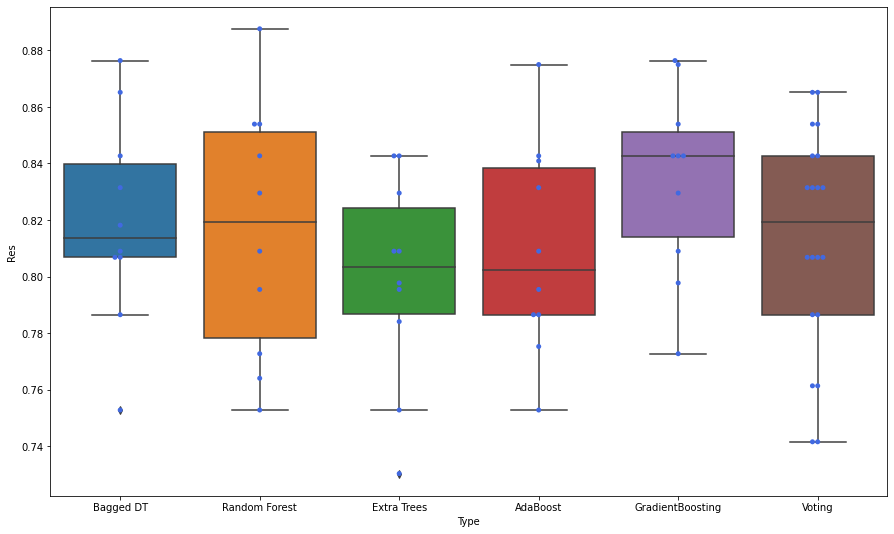

In [13]:
# Now let's compare them all

resall = pd.concat([resall,res_w1], ignore_index=True)

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

# Deep-dive Random Forest

## Feature Importance

Pclass           0.0925
Age              0.2759
Siblings/Spouses Aboard  0.0494
Parents/Children Aboard  0.0308
Fare             0.2744
Gender           0.2769


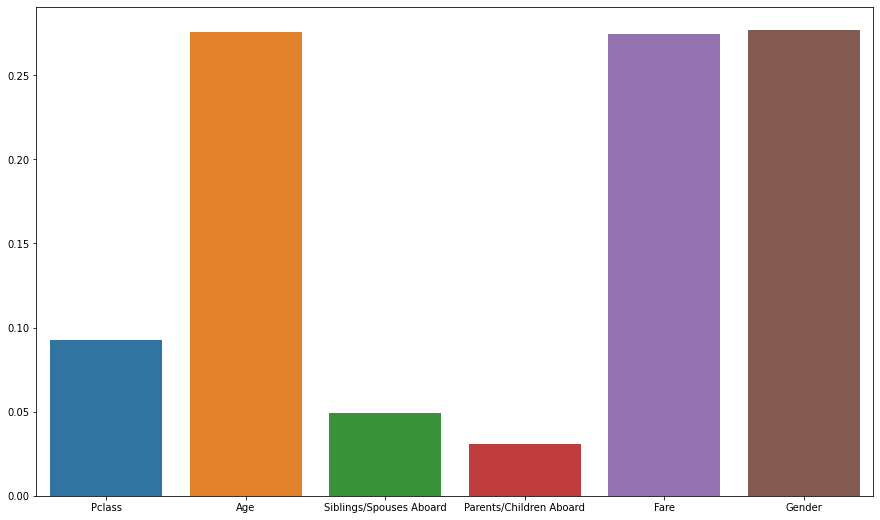

In [16]:
# Random Forest

plt.figure(figsize=(15,9))

from sklearn.ensemble import RandomForestClassifier

seed = 7

num_trees = 100
num_features = 3

model = RandomForestClassifier(n_estimators = num_trees, max_features = num_features, random_state = seed)
model.fit(X,y)

for name, importance in zip(titanic.columns[1:], model.feature_importances_):
    print(f'{name:15s}  {importance:.4f}')

sns.barplot(x = titanic.columns[1:], y = model.feature_importances_)

## Tuning Random Forest Models

In [20]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 50, 100, 150, 300],
        'max_depth': [3, 5, 10, 15, 20, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,2.075060,0.109642,0.129456,0.020940,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.786517,0.825843,0.881356,0.841808,0.836158,0.834336,0.030426,1
13,0.966288,0.069530,0.056267,0.007657,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.786517,0.814607,0.870056,0.841808,0.836158,0.829829,0.027962,2
12,0.592537,0.005229,0.034386,0.006251,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.792135,0.820225,0.875706,0.824859,0.830508,0.828687,0.026968,3
11,0.303220,0.007660,0.021877,0.007654,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.780899,0.797753,0.864407,0.841808,0.824859,0.821945,0.029920,4
8,0.800244,0.011696,0.046888,0.000002,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.797753,0.837079,0.824859,0.802260,0.841808,0.820752,0.017876,5
